In [1]:
#importing the required Packages
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn
import itertools
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from wordcloud import  STOPWORDS
from sklearn import ensemble
from sklearn import tree
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.util import mark_negation
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (15, 9)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Google COlab Mounting code part
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
################## Defining the required Defined Functions

#%% Functions
def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(tweet)).split())

def get_tweet_sentiment(tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

def tweet_clean(df):
    temp_df = df.copy()
    # Remove hyperlinks
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('https?:\/\/.*\/\w*', '', regex=True)
    # Remove citations
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\@\w*', '', regex=True)
    # Remove tickers
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\$\w*', '', regex=True)
    # Remove punctuation
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('[' + string.punctuation + ']+', '', regex=True)
    # Remove quotes
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\&*[amp]*\;|gt+', '', regex=True)
    # Remove RT
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('RT', '', regex=True)
    # Remove linebreak, tab, return
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('[\n\t\r]+', ' ', regex=True)
    # Remove via with blank
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('via+\s', '', regex=True)
    # Remove multiple whitespace
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\s+\s+', ' ', regex=True)
    # Remove multiple whitespace
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\s+\s+', ' ', regex=True)
    # Remove HashTags
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\#+[\w_]+[\w\'_\-]*[\w_]+', ' ', regex=True)
    # Remove Smileys
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('[:=]+(|o|O| )+[D\)\]]+[\(\[]+[pP]+[doO/\\]+[\(\[]+(\^_\^|)', ' ', regex=True)
    # Remove empty rows
    temp_df = temp_df.dropna()
    return temp_df

def regularExpression(textToFilter):
    filteredTweet = []
    retweetPattern = 'RT|@RT'
    urlPattern = 'https://[a-zA-Z0-9+&@#/%?=~_|!:,.;]*'

    for textLine in textToFilter:
        tweet = re.sub(retweetPattern,'',textLine)
        tweet = re.sub(urlPattern,'',tweet)
        filteredTweet.append(tweet)
    return filteredTweet

def nltkTokenizer(textToTokenize):
    filteredSentence = []
    usersPattern = re.compile('@[a-zA-Z0-9]*',re.UNICODE)
    hashtagPattern = re.compile('#[a-zA-Z0-9]*',re.UNICODE)
    stop_words = stopwords.words('english')

    for textLine in textToTokenize:
        words = re.sub(usersPattern,'',textLine)
        words = re.sub(hashtagPattern,'',words)
        words = word_tokenize(words)
        for w in words:
            if w not in stop_words and w not in '@' and w not in '#':
                filteredSentence.append(w)
    return filteredSentence

def tweet_to_words(raw_tweet):
    tweet = ''.join(c for c in raw_tweet if c not in string.punctuation)
    tweet = re.sub('((www\S+)|(http\S+))', 'urlsite', tweet)
    tweet = re.sub(r'\d+', 'contnum', tweet)
    tweet = re.sub(' +',' ', tweet)
    words = tweet.lower().split()
    stops = set(stopwords.words("english"))

    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

def users(tweet):
    user = []
    usersPattern = re.compile('@[a-zA-Z0-9]*',re.UNICODE)

    for t in tweet:
        u = re.findall(usersPattern,t)
        user.append(u)
    return user

def split_into_tokens(Text):
    return TextBlob(Text).words

def split_into_lemmas(Text):
    Text = Text.lower()
    words = TextBlob(Text).words
    # for each word, take its "base form" = lemma
    return [word.lemma for word in words]

In [4]:
file_path = "/content/drive/MyDrive/Dissertation/Code/resolution.csv(For Sentiment_Analysis ipynb).csv"

In [5]:
tweets = pd.read_csv(file_path, encoding='latin1')

print(tweets.shape[0])

1614


In [6]:
tweets.head()

Customer Data
0   Back in 2017 I reported an overflow pipe as l...
1   This highlighted the importance of good commu...
2   would like to launch a formal complaint about...
3   Specific jobs highlighted on visit to be book...
4  \t Scheduling were waiting on an update from ...

In [ ]:
tweets["Text"] = tweets['Customer Data']

In [ ]:
polarity = []
for num in tweets.Text:
  t = get_tweet_sentiment(num)
  polarity.append(t)
tweets['Polarity'] = polarity

In [ ]:
tweet = tweets["Text"]

cleaed_Tweet = clean_tweet(tweet)

Polarity = tweets.Polarity

tweet = tweets['Text']
data_sent = {'Text': tweet, 'Polarity': Polarity}
tweet_data = pd.DataFrame(data=data_sent)

print("========================================================================")
print("Printing the Head of the Tweets: =======================================")
print(tweet_data.head())
print("========================================================================")

Printing the Head of the Tweets: =======================================
                                                Text  Polarity
0   Back in 2017 I reported an overflow pipe as l...  negative
1   This highlighted the importance of good commu...  positive
2   would like to launch a formal complaint about...  negative
3   Specific jobs highlighted on visit to be book...   neutral
4  \t Scheduling were waiting on an update from ...  positive


In [ ]:
tweet_data.Polarity.value_counts()

positive    728
negative    488
neutral     398
Name: Polarity, dtype: int64

Ploting the TextBlob Sentiments: =======================================
positive    728
negative    488
neutral     398
Name: Polarity, dtype: int64


Text(0.5, 0, 'Sentiment expressed in Posts')

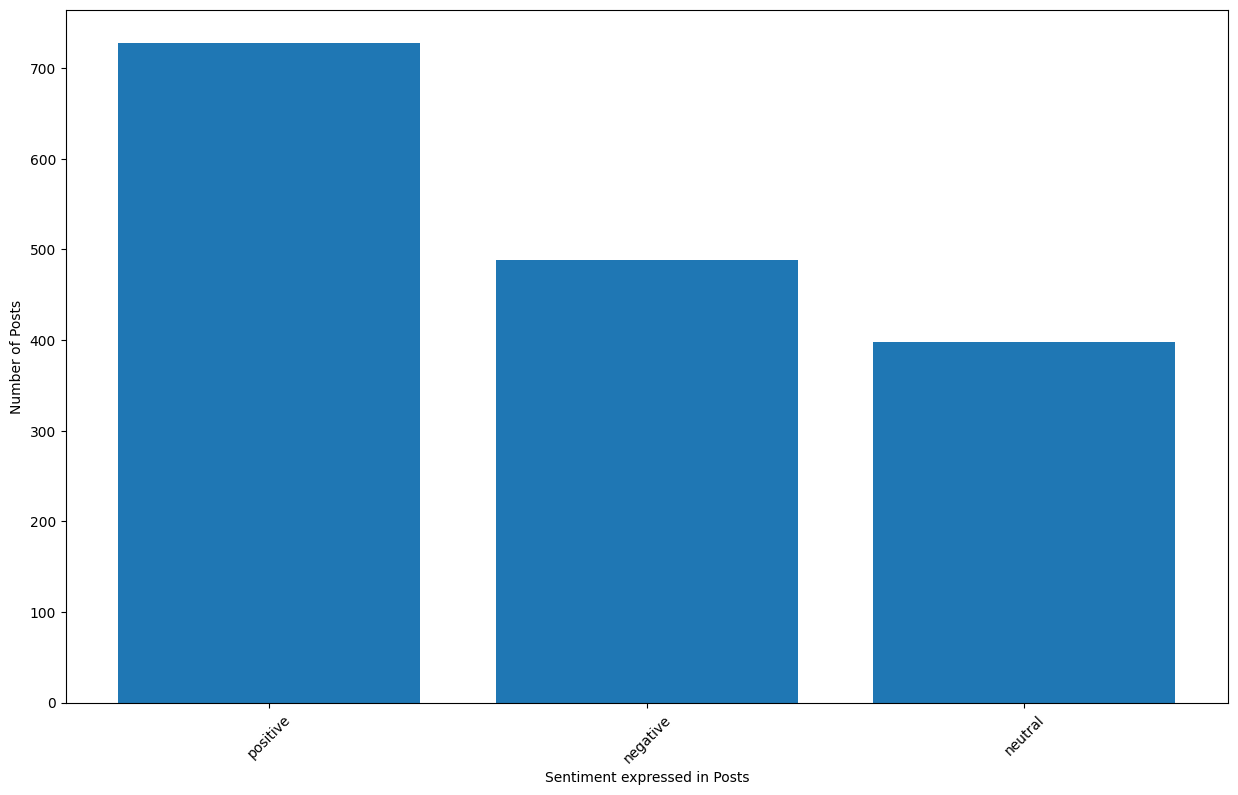

In [ ]:
print("Ploting the TextBlob Sentiments: =======================================")
Index = [0,1,2]
print(tweet_data.Polarity.value_counts())
plt.bar(Index,tweet_data.Polarity.value_counts())
plt.xticks(Index,['positive', 'negative', 'neutral'],rotation=45)
plt.ylabel('Number of Posts')
plt.xlabel('Sentiment expressed in Posts')


In [ ]:
polar = pd.DataFrame()
n = int(len(tweet))
sen = []
for i in range(n):
    blob = TextBlob(str(tweet[i]))
    k = blob.sentiment.polarity
    sen.append(k)

polar['polarity'] = sen
print("Printing the Polar Data Head: ==========================================")
print(polar.head())

Printing the Polar Data Head: ==========================================
   polarity
0 -0.025000
1  0.287500
2 -0.067269
3  0.000000
4  0.056818


Printing the head of Tweets Data Newly Formed: =========================
                                                Text  Polarity  length
0   Back in 2017 I reported an overflow pipe as l...  negative     194
1   This highlighted the importance of good commu...  positive     215
2   would like to launch a formal complaint about...  negative     887
3   Specific jobs highlighted on visit to be book...   neutral     124
4  \t Scheduling were waiting on an update from ...  positive    1276


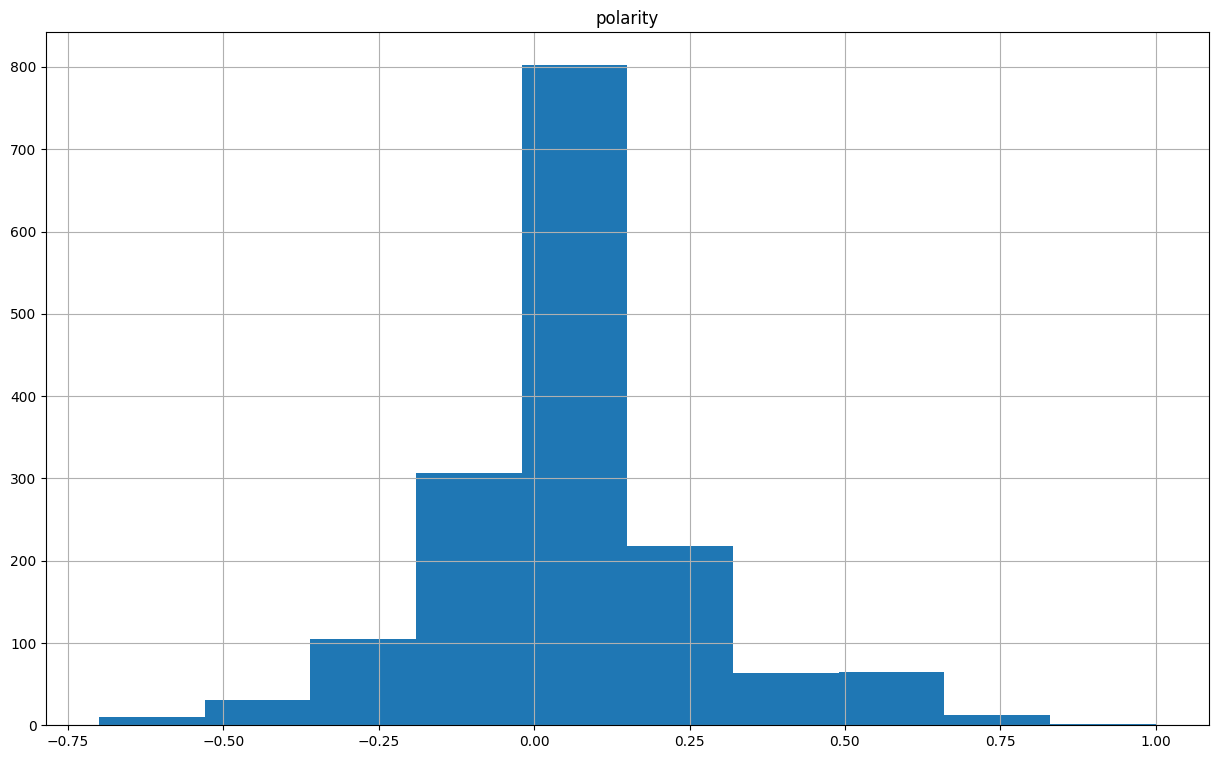

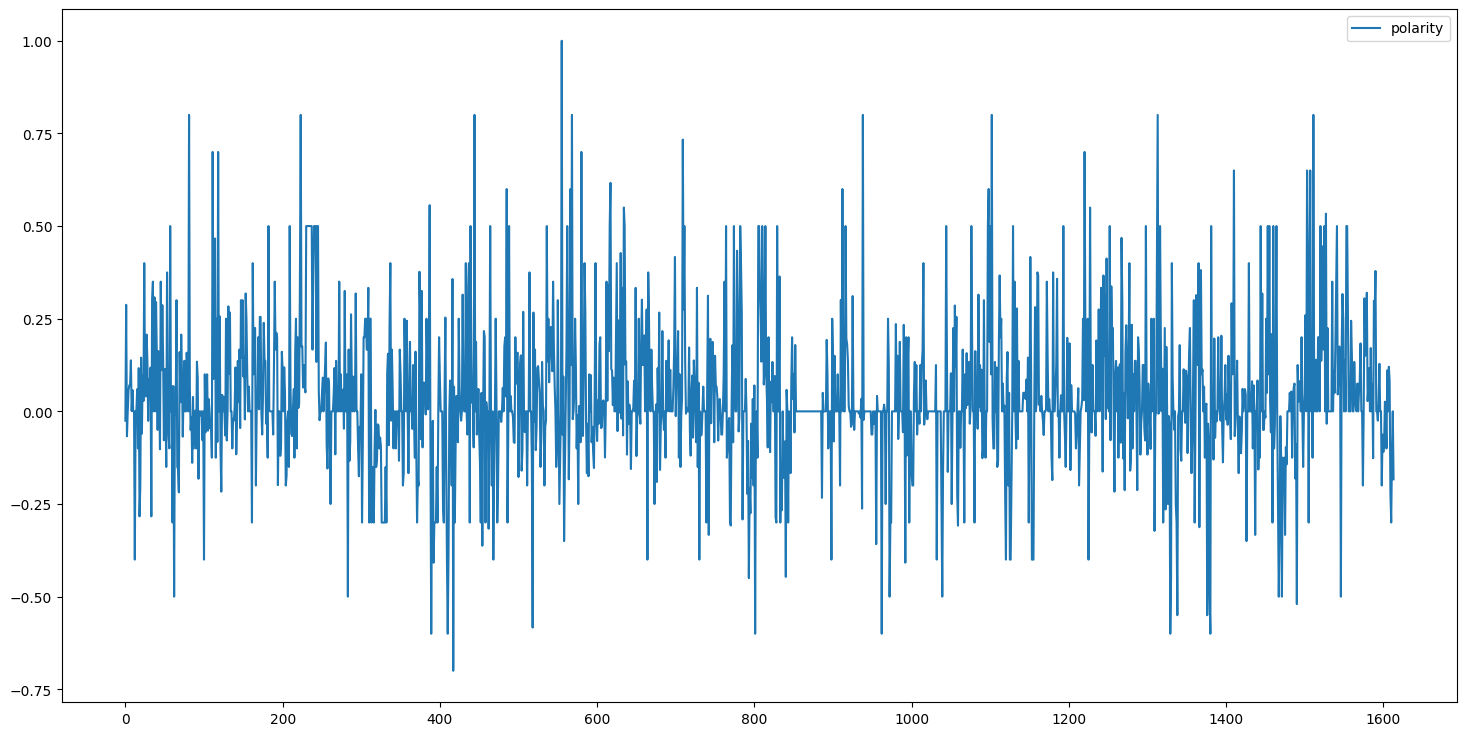

In [ ]:
polar.hist()
polar.plot.line(y='polarity',figsize=(18,9))

tweet_data.groupby('Polarity').describe()

tweet_data['length'] = tweet_data['Text'].astype(str).map(lambda text: len(text))
print("Printing the head of Tweets Data Newly Formed: =========================")
print(tweet_data.head())
print("========================================================================")

Histogram Plot of the Frequency: =======================================
Printing the Shape of the Tweets: ======================================
(50000, 3)


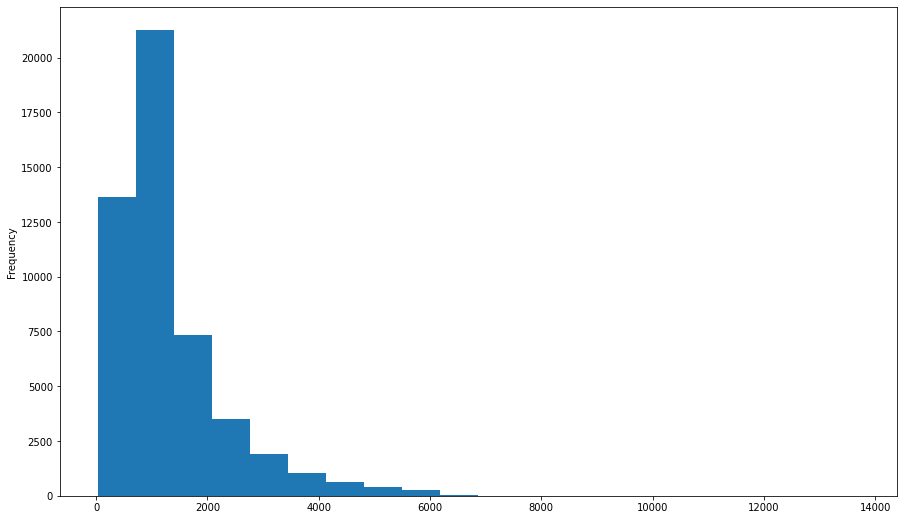

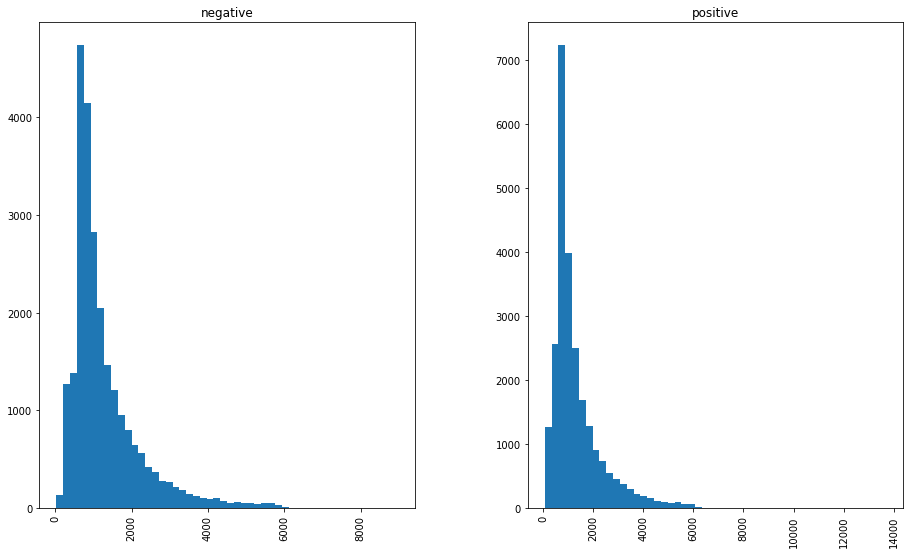

In [ ]:
print("Histogram Plot of the Frequency: =======================================")
tweet_data.length.plot(bins=20, kind='hist')

tweet_data.hist(column='length', by='Polarity', bins=50)
print("Printing the Shape of the Tweets: ======================================")
print(tweet_data.shape)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tweets_texts = tweet_data["Text"].tolist()
stop_words=stopwords.words('english')
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

# Get all the hashhtag words that has "#"
hashtags = ""
for line in tweets:
    words = line.split()
    for w in words:
        if w.startswith("#"):
            hashtags += w + " "

# Get all the hashtags in a list
hashtags_list = re.findall(r"#(\w+)", hashtags)

print("Ploting the Hashtag WordCloud: =========================================")
try:
    # Set the figure-size
    plt.figure(figsize= (20,10))
    wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=3000,
                          height=2000
                         ).generate(str(hashtags_list))

    plt.figure(1,figsize=(20, 20))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig('./twitter_wordcloud.png', dpi=300)
    plt.show()
except:
    print("No HashTags Found!! Please Verify the length")

print(len(hashtags_list))
print("========================================================================")

Ploting the Hashtag WordCloud: =========================================
No HashTags Found!! Please Verify the length
0


<Figure size 2000x1000 with 0 Axes>

Ploting the Polarity Numbers Extracted from the TextBlob: ==============


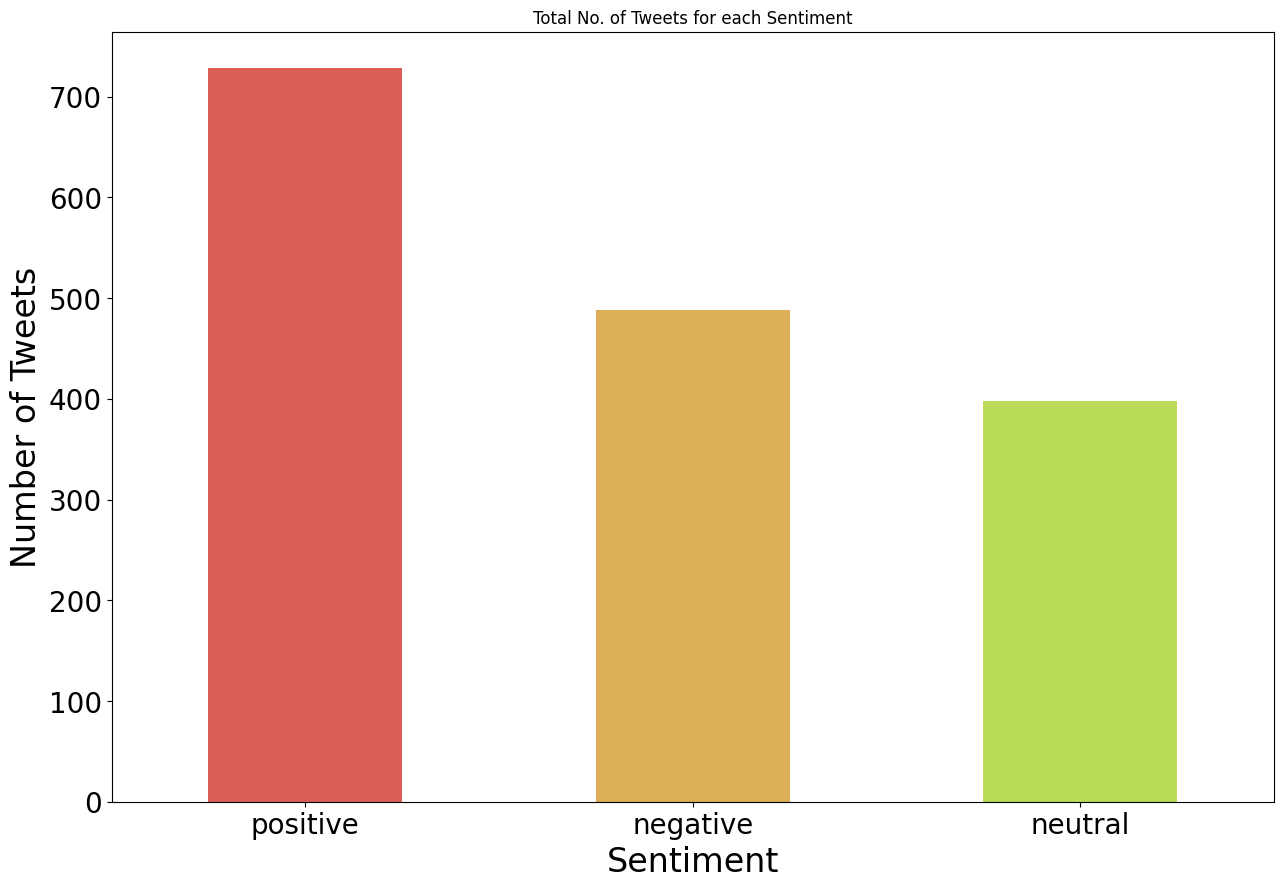

In [ ]:
print("Ploting the Polarity Numbers Extracted from the TextBlob: ==============")
tweet_data.Polarity.value_counts()

colors=seaborn.color_palette("hls", 10)
pd.Series(tweet_data["Polarity"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(15,10),fontsize=20,rot = 0, title = "Total No. of Tweets for each Sentiment")
plt.xlabel('Sentiment', fontsize=24)
plt.ylabel('Number of Tweets', fontsize=24)

colors=seaborn.color_palette("husl", 10)

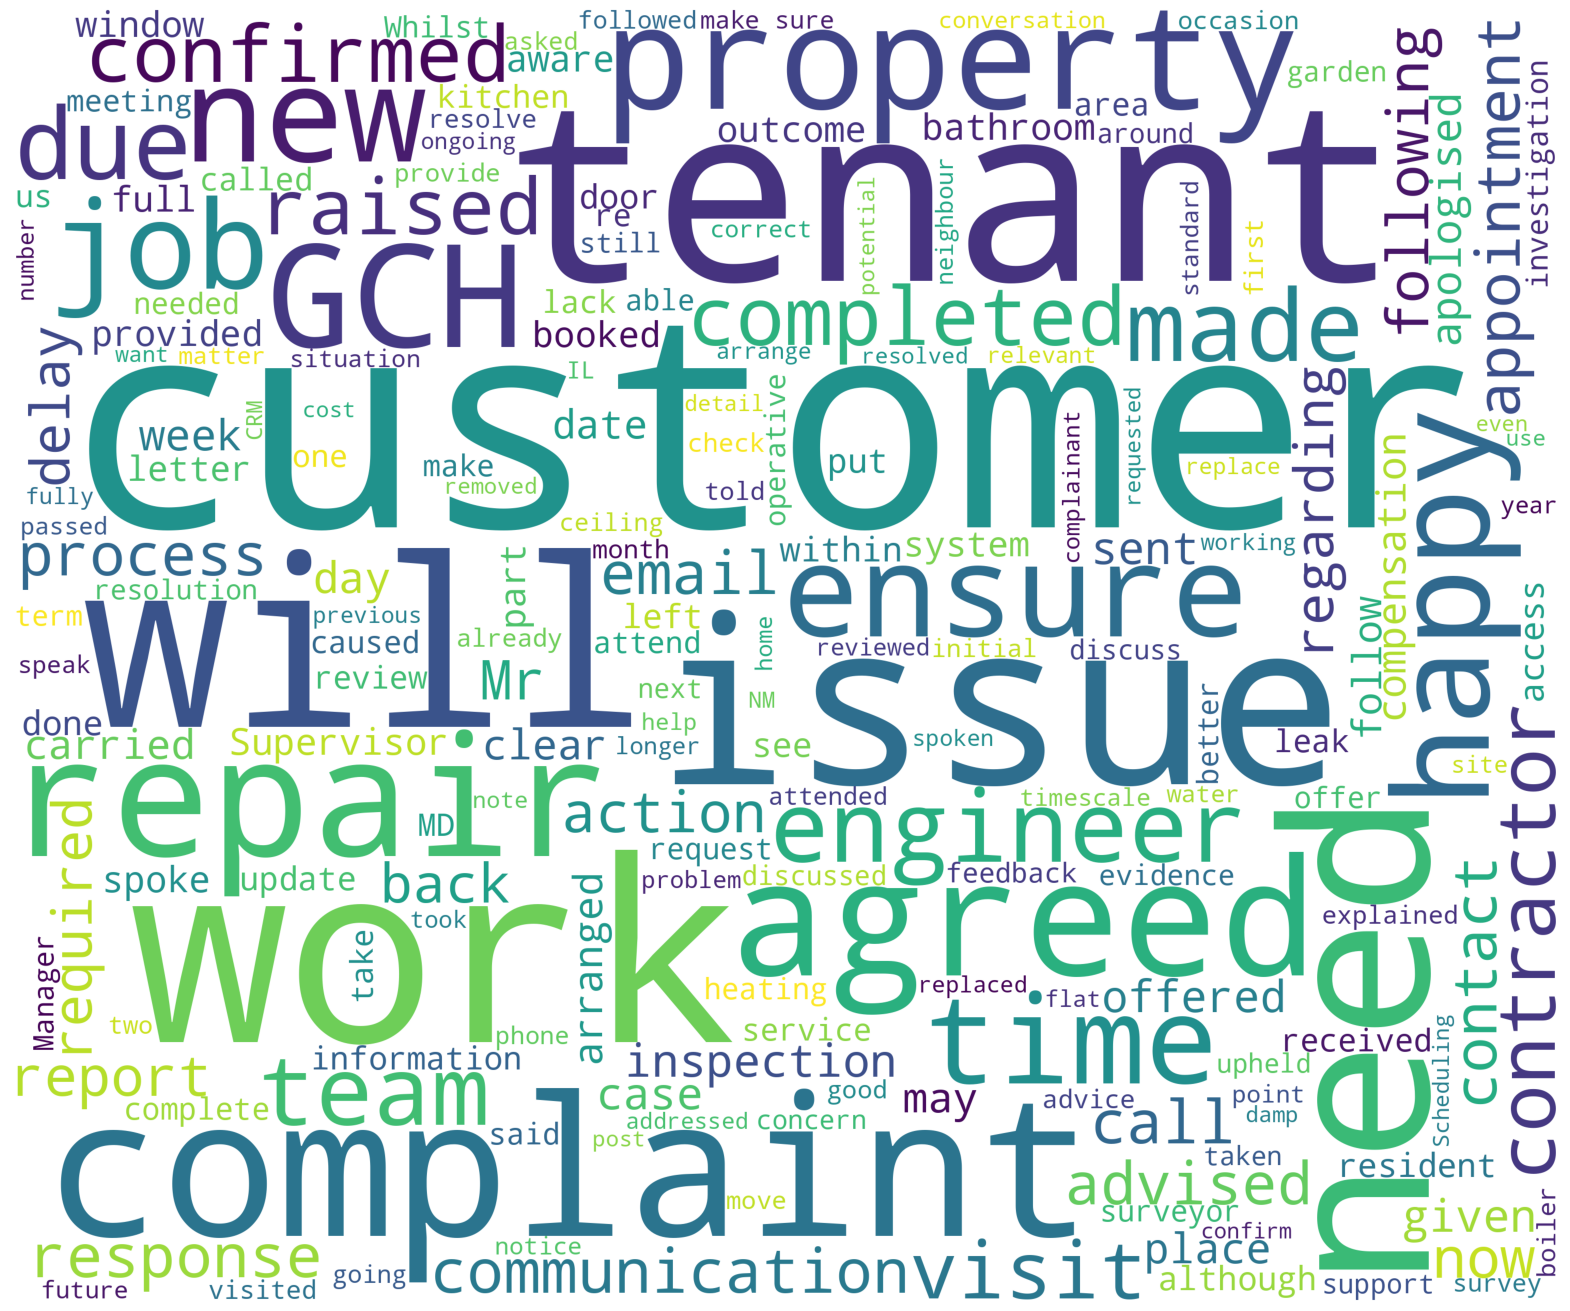

In [ ]:
df=tweet_data[tweet_data['Polarity']=='positive']
words = ' '.join(df['Text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

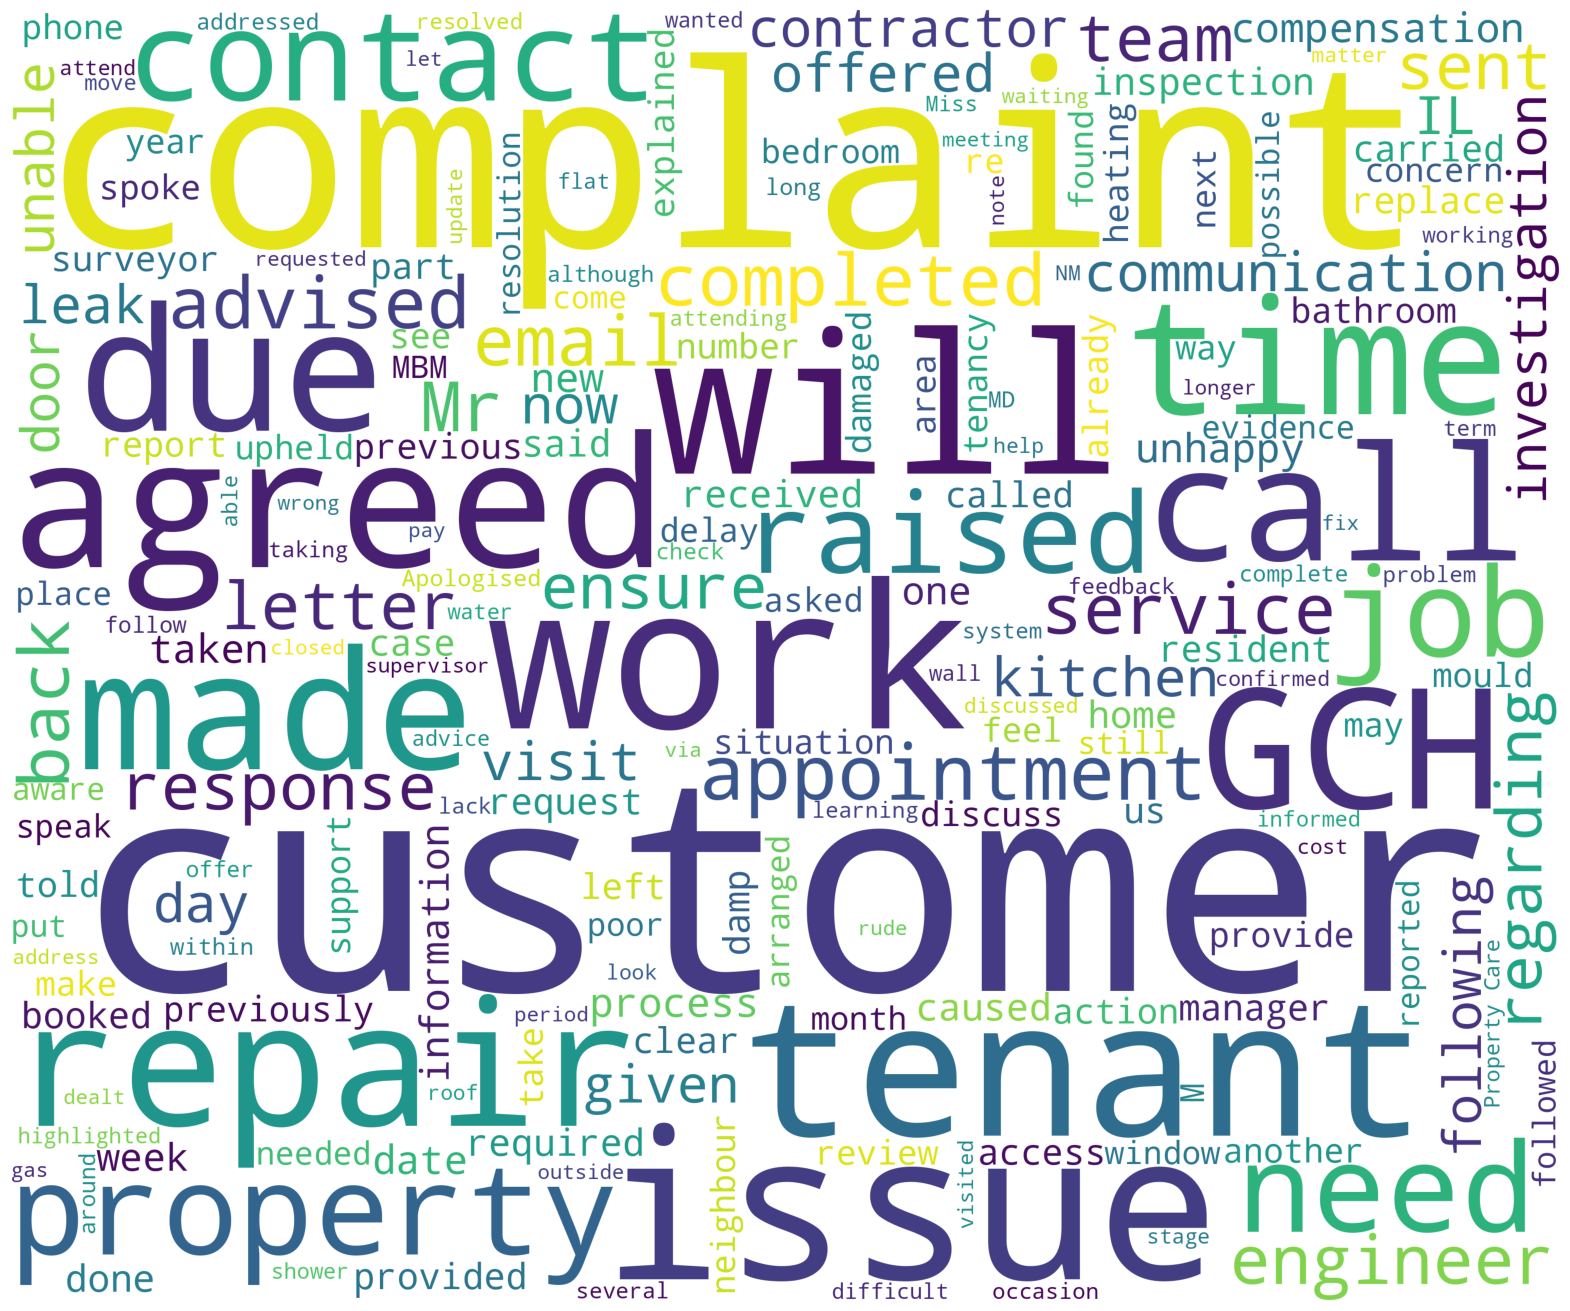

In [ ]:
df=tweet_data[tweet_data['Polarity']=='negative']
words = ' '.join(df['Text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

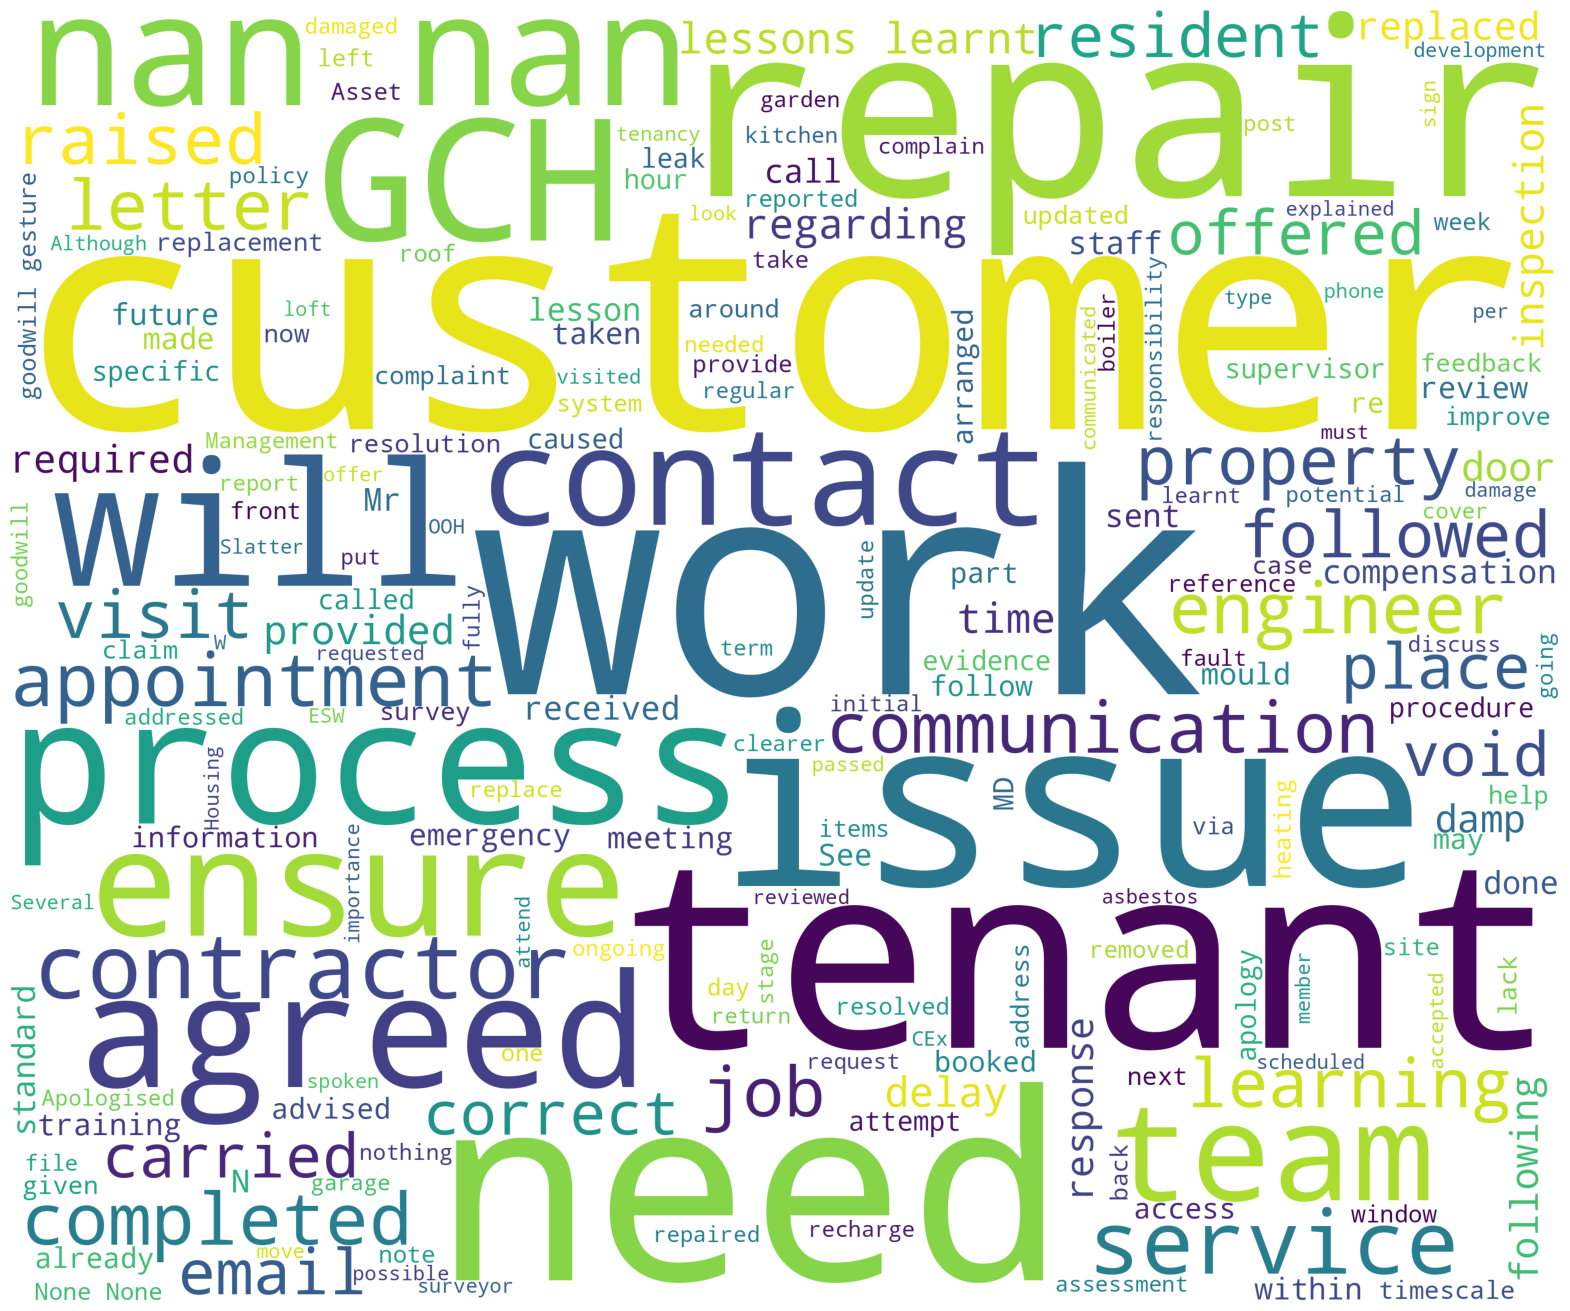

In [ ]:
df=tweet_data[tweet_data['Polarity']=='neutral']
words = ' '.join(df['Text'].astype(str))
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
print("========================================================================")
print("Starting the Machine Learning Analysis: ================================")
print("========================================================================")

tweet_data['clean_tweet']=tweet_data['Text'].apply(lambda x: tweet_to_words(x))
train,test = train_test_split(tweet_data,test_size=0.33,random_state=0)

train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)
print("Using the COUNTVECTORIZER: =============================================")
v = CountVectorizer(analyzer = "word",  max_features=1000)
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)


Classifiers = [
    LogisticRegression(C=0.001,multi_class='multinomial',max_iter=10,solver='sag', tol=1e-1),

    RandomForestClassifier(n_estimators=200, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs= -1,
            oob_score=False, random_state=10),

    AdaBoostClassifier(n_estimators=100, random_state=10),

    BernoulliNB(),

    MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),

    KNeighborsClassifier(algorithm='auto', metric='minkowski',
           metric_params=None, n_neighbors=2, p=2,
           weights='uniform'),

    tree.DecisionTreeClassifier(),

    ensemble.ExtraTreesClassifier(n_estimators=100,
                                  max_features= 50,
                                  criterion= 'entropy'),

    ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001,n_estimators=50, random_state=None, verbose = 0)]

dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
print("Entering into the Classifiers: =========================================")
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['Polarity'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['Polarity'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Polarity'])
    print("====================================================================")
    print("********************************************************************")
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print("********************************************************************")
    print("====================================================================")
    Accuracy.append(accuracy)
    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(test['Polarity'], pred)))
    cm = metrics.confusion_matrix(test['Polarity'], pred)
    print("--------------------------------------------------------------------")
    print("Confusion matrix:\n%s" % cm)
    print("--------------------------------------------------------------------")
    Model.append(classifier.__class__.__name__)
    print("********************************************************************")
    print("====================================================================")


Starting the Machine Learning Analysis: ================================
Using the COUNTVECTORIZER: =============================================
Entering into the Classifiers: =========================================
********************************************************************
Accuracy of LogisticRegressionis 0.8424242424242424
********************************************************************
Classification report for classifier LogisticRegression(C=0.001, max_iter=10, multi_class='multinomial',
                   solver='sag', tol=0.1):
              precision    recall  f1-score   support

    negative       0.86      0.82      0.84      8281
    positive       0.82      0.87      0.85      8219

    accuracy                           0.84     16500
   macro avg       0.84      0.84      0.84     16500
weighted avg       0.84      0.84      0.84     16500


--------------------------------------------------------------------
Confusion matrix:
[[6754 1527]
 [1073 7146]]
-

Ploting the Model Performances: ========================================


Text(0.5, 1.0, 'Accuracies of Models')

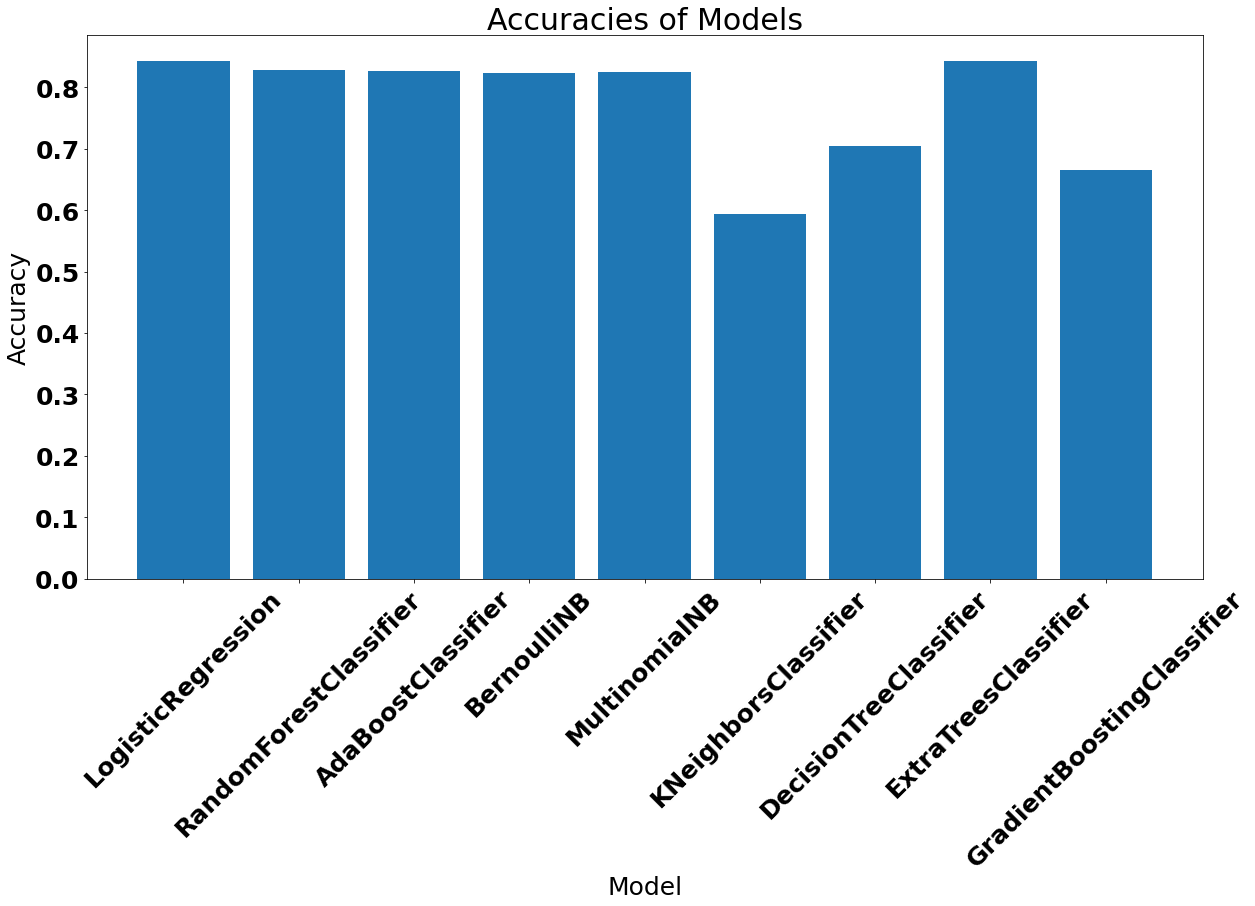

In [ ]:
print("Ploting the Model Performances: ========================================")
Index = [1,2,3,4,5,6,7,8,9]
plt.figure(1,figsize=(20, 10))
font = {'weight' : 'bold',
        'size'   : 25}

plt.rc('font', **font)

plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [ ]:
test['Polarity']

11841    positive
19602    negative
45519    negative
25747    positive
42642    positive
           ...   
19935    negative
11291    positive
28815    positive
21801    negative
44420    negative
Name: Polarity, Length: 16500, dtype: object